In [1]:
from preprocessing import *
import preprocessing as prp
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data as data_utils
from usad import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
dataframe = pd.read_csv(r"/home/medoro/Unsupervised_Anomaly_Detection_thesis/data/train.csv")
dataframe.shape

(1749494, 57)

In [3]:
df=dataframe[['building_id','primary_use', 'timestamp', 'meter_reading', 'sea_level_pressure', 'is_holiday','anomaly']]
df

building_id                    primary_use            timestamp  \
0                  1                      Education  2016-01-01 00:00:00   
1                 32                         Office  2016-01-01 00:00:00   
2                 41                         Office  2016-01-01 00:00:00   
3                 55                         Office  2016-01-01 00:00:00   
4                 69                        Parking  2016-01-01 00:00:00   
...              ...                            ...                  ...   
1749489         1316  Entertainment/public assembly  2016-12-31 23:00:00   
1749490         1318  Entertainment/public assembly  2016-12-31 23:00:00   
1749491         1319  Entertainment/public assembly  2016-12-31 23:00:00   
1749492         1323                         Office  2016-12-31 23:00:00   
1749493         1353              Religious worship  2016-12-31 23:00:00   

         meter_reading  sea_level_pressure  is_holiday  anomaly  
0                  NaN               967.2           1        0  
1                  NaN               967.2           1        0  
2                  NaN               967.2           1        0  
3                  NaN               967.2           1        0  
4                  NaN               967.2           1        0  
...                ...                 ...         ...      ...  
1749489         38.844               967.2           0        0  
1749490        202.893               967.2           0        0  
1749491            NaN               967.2           0        0  
1749492        172.000               967.2           0        0  
1749493          2.400               967.2           0        0  

[1749494 rows x 7 columns]

In [4]:
imputed_df = impute_nulls(df)
imputed_df

building_id        primary_use            timestamp  meter_reading  \
0                  1          Education  2016-01-01 00:00:00      31.477940   
200                1          Education  2016-01-01 01:00:00      29.582970   
398                1          Education  2016-01-01 02:00:00      28.635485   
597                1          Education  2016-01-01 03:00:00      28.161742   
796                1          Education  2016-01-01 04:00:00      27.924871   
...              ...                ...                  ...            ...   
1748693         1353  Religious worship  2016-12-31 19:00:00       2.425000   
1748893         1353  Religious worship  2016-12-31 20:00:00       2.450000   
1749093         1353  Religious worship  2016-12-31 21:00:00       2.425000   
1749293         1353  Religious worship  2016-12-31 22:00:00       2.450000   
1749493         1353  Religious worship  2016-12-31 23:00:00       2.400000   

         sea_level_pressure  is_holiday  anomaly  
0                     967.2           1        0  
200                  1019.4           1        0  
398                  1018.8           1        0  
597                  1018.1           1        0  
796                  1019.0           1        0  
...                     ...         ...      ...  
1748693               967.2           0        0  
1748893               967.2           0        0  
1749093               967.2           0        0  
1749293               967.2           0        0  
1749493               967.2           0        0  

[1749494 rows x 7 columns]

Now that we have imputed the missing values for the column containing the energy consumption measurements, we can procees by adding a couple of features more and further imputing the missing dates for each timeseries in the dataset.

In [5]:
df = add_trigonometric_features(imputed_df)
df

building_id        primary_use           timestamp  meter_reading  \
0                  1          Education 2016-01-01 00:00:00      31.477940   
200                1          Education 2016-01-01 01:00:00      29.582970   
398                1          Education 2016-01-01 02:00:00      28.635485   
597                1          Education 2016-01-01 03:00:00      28.161742   
796                1          Education 2016-01-01 04:00:00      27.924871   
...              ...                ...                 ...            ...   
1748693         1353  Religious worship 2016-12-31 19:00:00       2.425000   
1748893         1353  Religious worship 2016-12-31 20:00:00       2.450000   
1749093         1353  Religious worship 2016-12-31 21:00:00       2.425000   
1749293         1353  Religious worship 2016-12-31 22:00:00       2.450000   
1749493         1353  Religious worship 2016-12-31 23:00:00       2.400000   

         sea_level_pressure  is_holiday  anomaly  weekday  weekday_y  \
0                     967.2           1        0        4  -0.433884   
200                  1019.4           1        0        4  -0.433884   
398                  1018.8           1        0        4  -0.433884   
597                  1018.1           1        0        4  -0.433884   
796                  1019.0           1        0        4  -0.433884   
...                     ...         ...      ...      ...        ...   
1748693               967.2           0        0        5  -0.974928   
1748893               967.2           0        0        5  -0.974928   
1749093               967.2           0        0        5  -0.974928   
1749293               967.2           0        0        5  -0.974928   
1749493               967.2           0        0        5  -0.974928   

         weekday_x  
0        -0.900969  
200      -0.900969  
398      -0.900969  
597      -0.900969  
796      -0.900969  
...            ...  
1748693  -0.222521  
1748893  -0.222521  
1749093  -0.222521  
1749293  -0.222521  
1749493  -0.222521  

[1749494 rows x 10 columns]

In [6]:
dfs_dict = impute_missing_dates(df)

/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:76: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_index = pd.date_range(start_ts, end=end_ts, freq="1H")


In [7]:
dfs_dict

{1:                      building_id primary_use  meter_reading  \
 2016-01-01 00:00:00            1   Education      31.477940   
 2016-01-01 01:00:00            1   Education      29.582970   
 2016-01-01 02:00:00            1   Education      28.635485   
 2016-01-01 03:00:00            1   Education      28.161742   
 2016-01-01 04:00:00            1   Education      27.924871   
 ...                          ...         ...            ...   
 2016-12-31 19:00:00            1   Education      20.006000   
 2016-12-31 20:00:00            1   Education      15.364000   
 2016-12-31 21:00:00            1   Education      15.685000   
 2016-12-31 22:00:00            1   Education      15.925000   
 2016-12-31 23:00:00            1   Education      14.964000   
 
                      sea_level_pressure  is_holiday  anomaly  weekday  \
 2016-01-01 00:00:00               967.2           1        0        4   
 2016-01-01 01:00:00              1019.4           1        0        4   
 2016

In [8]:
df1 = pd.concat(dfs_dict.values())
df1

building_id        primary_use  meter_reading  \
2016-01-01 00:00:00            1          Education      31.477940   
2016-01-01 01:00:00            1          Education      29.582970   
2016-01-01 02:00:00            1          Education      28.635485   
2016-01-01 03:00:00            1          Education      28.161742   
2016-01-01 04:00:00            1          Education      27.924871   
...                          ...                ...            ...   
2016-12-31 19:00:00         1353  Religious worship       2.425000   
2016-12-31 20:00:00         1353  Religious worship       2.450000   
2016-12-31 21:00:00         1353  Religious worship       2.425000   
2016-12-31 22:00:00         1353  Religious worship       2.450000   
2016-12-31 23:00:00         1353  Religious worship       2.400000   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00               967.2           1        0        4   
2016-01-01 01:00:00              1019.4           1        0        4   
2016-01-01 02:00:00              1018.8           1        0        4   
2016-01-01 03:00:00              1018.1           1        0        4   
2016-01-01 04:00:00              1019.0           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[1756800 rows x 9 columns]

Let's now obtain the train and validation set. We are going to split the dataset into 2 sets, according to the building id.

In [9]:
#dfs_train, dfs_val = train_val_split(df1)
#train = pd.concat(dfs_train.values())

In [10]:
#val = pd.concat(dfs_val.values())

In [11]:
dfs_train, dfs_val, dfs_test = train_val_test_split(df1)
train = pd.concat(dfs_train.values())

In [12]:
val = pd.concat(dfs_val.values())

In [13]:
test = pd.concat(dfs_test.values())

In [14]:
train

building_id primary_use  meter_reading  \
2016-01-01 00:00:00            1   Education      31.477940   
2016-01-01 01:00:00            1   Education      29.582970   
2016-01-01 02:00:00            1   Education      28.635485   
2016-01-01 03:00:00            1   Education      28.161742   
2016-01-01 04:00:00            1   Education      27.924871   
...                          ...         ...            ...   
2016-12-31 19:00:00         1238      Office      54.900000   
2016-12-31 20:00:00         1238      Office      56.000000   
2016-12-31 21:00:00         1238      Office      66.400000   
2016-12-31 22:00:00         1238      Office      67.100000   
2016-12-31 23:00:00         1238      Office      71.400000   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00               967.2           1        0        4   
2016-01-01 01:00:00              1019.4           1        0        4   
2016-01-01 02:00:00              1018.8           1        0        4   
2016-01-01 03:00:00              1018.1           1        0        4   
2016-01-01 04:00:00              1019.0           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[1133136 rows x 9 columns]

In [15]:
val

building_id        primary_use  meter_reading  \
2016-01-01 00:00:00         1241         Healthcare        234.180   
2016-01-01 01:00:00         1241         Healthcare        294.156   
2016-01-01 02:00:00         1241         Healthcare        354.152   
2016-01-01 03:00:00         1241         Healthcare        294.121   
2016-01-01 04:00:00         1241         Healthcare        294.102   
...                          ...                ...            ...   
2016-12-31 19:00:00         1353  Religious worship          2.425   
2016-12-31 20:00:00         1353  Religious worship          2.450   
2016-12-31 21:00:00         1353  Religious worship          2.425   
2016-12-31 22:00:00         1353  Religious worship          2.450   
2016-12-31 23:00:00         1353  Religious worship          2.400   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00              1018.9           1        0        4   
2016-01-01 01:00:00              1018.4           1        0        4   
2016-01-01 02:00:00              1018.2           1        0        4   
2016-01-01 03:00:00              1018.3           1        0        4   
2016-01-01 04:00:00              1018.2           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[289872 rows x 9 columns]

In [16]:
test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00      19.232375               967.2           1        0   
2016-01-01 01:00:00      13.457187              1019.4           1        0   
2016-01-01 02:00:00      10.569594              1018.8           1        0   
2016-01-01 03:00:00       9.125797              1018.1           1        0   
2016-01-01 04:00:00       8.403898              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00     132.040616               967.2           0        0   
2016-12-31 20:00:00     132.040616               967.2           0        0   
2016-12-31 21:00:00     132.040616               967.2           0        0   
2016-12-31 22:00:00     132.040616               967.2           0        0   
2016-12-31 23:00:00     132.040616               967.2           0        0   

                     weekday  weekday_y  weekday_x  
2016-01-01 00:00:00        4  -0.433884  -0.900969  
2016-01-01 01:00:00        4  -0.433884  -0.900969  
2016-01-01 02:00:00        4  -0.433884  -0.900969  
2016-01-01 03:00:00        4  -0.433884  -0.900969  
2016-01-01 04:00:00        4  -0.433884  -0.900969  
...                      ...        ...        ...  
2016-12-31 19:00:00        5  -0.974928  -0.222521  
2016-12-31 20:00:00        5  -0.974928  -0.222521  
2016-12-31 21:00:00        5  -0.974928  -0.222521  
2016-12-31 22:00:00        5  -0.974928  -0.222521  
2016-12-31 23:00:00        5  -0.974928  -0.222521  

[333792 rows x 9 columns]

In [17]:
train_window = 72

In [18]:
#X, y = split_sequences(train, train_window)
X_train, y_train = create_train_eval_sequences(train, train_window)

In [19]:
X_train, y_train

(array([[[0.60893402],
         [0.54943545],
         [0.51968617],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        [[0.54943545],
         [0.51968617],
         [0.50481153],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        [[0.51968617],
         [0.50481153],
         [0.49737421],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        ...,
 
        [[0.53063399],
         [0.53063399],
         [0.4389984 ],
         ...,
         [0.28716036],
         [0.29302078],
         [0.34842834]],
 
        [[0.53063399],
         [0.4389984 ],
         [0.45285029],
         ...,
         [0.29302078],
         [0.34842834],
         [0.3521577 ]],
 
        [[0.4389984 ],
         [0.45285029],
         [0.40596697],
         ...,
         [0.34842834],
         [0.3521577 ],
         [0.3750666 ]]]),
 array([[0.60893402, 0.54943545, 0.51968617, ..., 0.489

In [20]:
X_train.shape, y_train.shape

((1123977, 72, 1), (1123977, 72))

In [21]:
BATCH_SIZE =  128
N_EPOCHS = 10
hidden_size = 1/8

In [22]:
w_size = X_train.shape[1] * X_train.shape[2]
z_size = w_size * hidden_size #X_train.shape[1] * hidden_size 
w_size, z_size

(72, 9.0)

In [23]:
z_size = int(z_size)

In [24]:
z_size

9

In [25]:
import torch.utils.data as data_utils

In [26]:
train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_train).float().view(([X_train.shape[0], w_size]))), batch_size = BATCH_SIZE, shuffle = False, num_workers = 0)

In [27]:
#X_val, y_val = split_sequences(val, train_window)
X_val, y_val = create_train_eval_sequences(val, train_window)

In [28]:
X_val.shape, y_val.shape

((287529, 72, 1), (287529, 72))

In [29]:
val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_val).float().view(([X_val.shape[0],w_size]))) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [30]:
device = get_default_device()
device

device(type='cuda')

In [31]:
! export CUDA_VISIBLE_DEVICES=2

In [32]:
model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [33]:
N_EPOCHS = 5

In [34]:
history = training(N_EPOCHS,model,train_loader,val_loader) #2.15 min a epoch

Epoch [0], val_loss1: 0.0083, val_loss2: 0.0082
Epoch [1], val_loss1: 0.0143, val_loss2: -0.0029
Epoch [2], val_loss1: 0.0143, val_loss2: -0.0072
Epoch [3], val_loss1: 0.0202, val_loss2: -0.0137
Epoch [4], val_loss1: 0.0197, val_loss2: -0.0140


In [35]:
history

[{'val_loss1': 0.008333343081176281, 'val_loss2': 0.008237864822149277},
 {'val_loss1': 0.014296497218310833, 'val_loss2': -0.002853889251127839},
 {'val_loss1': 0.01432421151548624, 'val_loss2': -0.007192532531917095},
 {'val_loss1': 0.020151592791080475, 'val_loss2': -0.013661595992743969},
 {'val_loss1': 0.01966860145330429, 'val_loss2': -0.014021199196577072}]

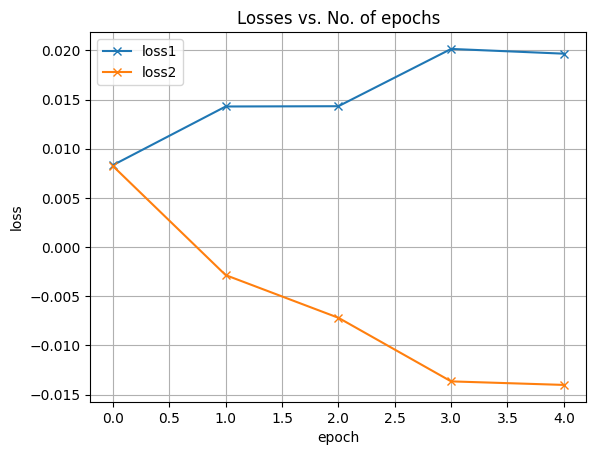

In [36]:
plot_history(history)

In [ ]:
# /home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints


In [37]:
print(model)

UsadModel(
  (encoder): Encoder(
    (linear1): Linear(in_features=72, out_features=36, bias=True)
    (linear2): Linear(in_features=36, out_features=18, bias=True)
    (linear3): Linear(in_features=18, out_features=9, bias=True)
    (relu): ReLU(inplace=True)
  )
  (decoder1): Decoder(
    (linear1): Linear(in_features=9, out_features=18, bias=True)
    (linear2): Linear(in_features=18, out_features=36, bias=True)
    (linear3): Linear(in_features=36, out_features=72, bias=True)
    (relu): ReLU(inplace=True)
    (sigmoid): Sigmoid()
  )
  (decoder2): Decoder(
    (linear1): Linear(in_features=9, out_features=18, bias=True)
    (linear2): Linear(in_features=18, out_features=36, bias=True)
    (linear3): Linear(in_features=36, out_features=72, bias=True)
    (relu): ReLU(inplace=True)
    (sigmoid): Sigmoid()
  )
)


In [38]:
torch.save({
            'epoch': N_EPOCHS,
            'model': model.state_dict(),
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict(),
            }, "/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_test2_5epochs.pth")

In [34]:
checkpoint = torch.load("/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_test2_5epochs.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [35]:
X_test, y_test = create_train_eval_sequences(test, train_window)

In [36]:
X_test.shape, y_test.shape

((331094, 72, 1), (331094, 72))

In [37]:
test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(X_test).float().view(([X_test.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [38]:
results=testing(model,test_loader) #Prova con il test set

In [39]:
results, w1, w2 = testing_prova(model, test_loader)

In [40]:
results

[tensor([0.0033, 0.0032, 0.0032, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
         0.0033, 0.0033, 0.0

In [41]:
w1

[tensor([[0.1586, 0.1608, 0.1664,  ..., 0.1293, 0.1297, 0.1328],
         [0.1544, 0.1548, 0.1573,  ..., 0.1351, 0.1336, 0.1348],
         [0.1519, 0.1518, 0.1529,  ..., 0.1388, 0.1362, 0.1363],
         ...,
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393]],
        device='cuda:0'),
 tensor([[0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         ...,
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393]],
        device='cuda:0'),
 tensor([[0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
        

In [42]:
len(test_loader)

2587

In [43]:
batches = []
for [batch] in test_loader:
    batches.append(batch)
batches

[tensor([[0.3504, 0.2448, 0.1919,  ..., 0.1391, 0.1391, 0.1391],
         [0.2448, 0.1919, 0.1655,  ..., 0.1391, 0.1391, 0.1391],
         [0.1919, 0.1655, 0.1523,  ..., 0.1391, 0.1391, 0.1391],
         ...,
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391]]),
 tensor([[0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         ...,
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391]]),
 tensor([[0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.1391],
         [0.1391, 0.1391, 0.1391,  ..., 0.1391, 0.1391, 0.

In [44]:
len(w1)

2587

In [45]:
len(w1[1]), len(w1[-1])

(128, 86)

In [46]:
w2

[tensor([[0.2287, 0.2342, 0.2369,  ..., 0.1690, 0.1863, 0.2034],
         [0.2204, 0.2232, 0.2247,  ..., 0.1770, 0.1898, 0.2031],
         [0.2184, 0.2204, 0.2216,  ..., 0.1796, 0.1914, 0.2039],
         ...,
         [0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033],
         [0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033],
         [0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033]],
        device='cuda:0'),
 tensor([[0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033],
         [0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033],
         [0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033],
         ...,
         [0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033],
         [0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033],
         [0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033]],
        device='cuda:0'),
 tensor([[0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033],
         [0.2169, 0.2184, 0.2193,  ..., 0.1805, 0.1914, 0.2033],
        

In [47]:
w1

[tensor([[0.1586, 0.1608, 0.1664,  ..., 0.1293, 0.1297, 0.1328],
         [0.1544, 0.1548, 0.1573,  ..., 0.1351, 0.1336, 0.1348],
         [0.1519, 0.1518, 0.1529,  ..., 0.1388, 0.1362, 0.1363],
         ...,
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393]],
        device='cuda:0'),
 tensor([[0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         ...,
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393]],
        device='cuda:0'),
 tensor([[0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
         [0.1503, 0.1496, 0.1493,  ..., 0.1441, 0.1404, 0.1393],
        

In [48]:
import torch.nn.functional as F

In [49]:
last = w1[-1]

In [50]:
last

tensor([[0.3240, 0.3268, 0.3380,  ..., 0.3223, 0.3276, 0.3387],
        [0.3240, 0.3268, 0.3380,  ..., 0.3223, 0.3276, 0.3387],
        [0.3240, 0.3268, 0.3380,  ..., 0.3223, 0.3276, 0.3387],
        ...,
        [0.3418, 0.3434, 0.3518,  ..., 0.3471, 0.3513, 0.3625],
        [0.3421, 0.3437, 0.3522,  ..., 0.3468, 0.3510, 0.3620],
        [0.3422, 0.3439, 0.3524,  ..., 0.3465, 0.3506, 0.3616]],
       device='cuda:0')

In [51]:
last.size()

torch.Size([86, 72])

In [52]:
len(last)

86

In [53]:
padded_last = F.pad(last, (0, 0, 0, 42))
padded_last

tensor([[0.3240, 0.3268, 0.3380,  ..., 0.3223, 0.3276, 0.3387],
        [0.3240, 0.3268, 0.3380,  ..., 0.3223, 0.3276, 0.3387],
        [0.3240, 0.3268, 0.3380,  ..., 0.3223, 0.3276, 0.3387],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [54]:
len(padded_last[86])

72

In [55]:
len(w1[:-1])

2586

In [56]:
new_lista = w1[:-1]
new_lista.append(padded_last)

In [57]:
res_w1 = torch.cat(new_lista, dim=0)
res_w1

tensor([[0.1586, 0.1608, 0.1664,  ..., 0.1293, 0.1297, 0.1328],
        [0.1544, 0.1548, 0.1573,  ..., 0.1351, 0.1336, 0.1348],
        [0.1519, 0.1518, 0.1529,  ..., 0.1388, 0.1362, 0.1363],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [58]:
res_w1.size() # Need to eliminate last 42 rows (padded before)

torch.Size([331136, 72])

In [59]:
original_rec = res_w1[:-42]

In [60]:
original_rec.size()

torch.Size([331094, 72])

In [61]:
origin_rec = original_rec.detach().cpu().numpy()
origin_rec

array([[0.15863119, 0.1607718 , 0.16638902, ..., 0.12929766, 0.12972945,
        0.13275743],
       [0.15438062, 0.1548235 , 0.15729135, ..., 0.13512544, 0.13363573,
        0.1347507 ],
       [0.15189531, 0.15176226, 0.15291427, ..., 0.13881709, 0.13620885,
        0.13625328],
       ...,
       [0.34183487, 0.34343636, 0.3517742 , ..., 0.34705666, 0.35129482,
        0.36248532],
       [0.34206054, 0.3436968 , 0.35215405, ..., 0.34680793, 0.3509593 ,
        0.36203784],
       [0.34218374, 0.34386665, 0.35244954, ..., 0.34651476, 0.35060996,
        0.36162287]], dtype=float32)

In [62]:
origin_rec.shape

(331094, 72)

In [63]:
reconstruction = apply_reconstruction(origin_rec, test.building_id.nunique())

0


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


1


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


2


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


3


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


4


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


5


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


6


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


7


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


8


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


9


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


10


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


11


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


12


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


13


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


14


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


15


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


16


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


17


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


18


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


19


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


20


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


21


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


22


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


23


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


24


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


25


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


26


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


27


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


28


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


29


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


30


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


31


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


32


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


33


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


34


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


35


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


36


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


37


/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:187: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)


ValueError: cannot reshape array of size 333792 into shape (1423008,1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
dfs_dict_1 = {}
for building_id, gdf in test.groupby("building_id"):
  gdf[['meter_reading']]=scaler.fit_transform(gdf[['meter_reading']])
  dfs_dict_1[building_id] = gdf
predicted_df_test = pd.concat(dfs_dict_1.values())

In [ ]:
predicted_df_test['reconstruction'] = reconstruction

In [ ]:
predicted_df_test

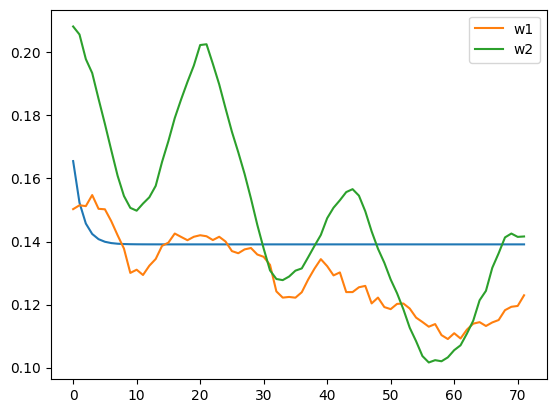

In [56]:
plt.plot(batches[0][3])
plt.plot(w1[0][3].cpu(), label = "w1")
plt.plot(w2[0][3].cpu(), label = "w2")
plt.legend()
plt.show()

In [44]:
len(results), len(results[0])

(2587, 128)

In [45]:
results[-1]

tensor([0.0075, 0.0074, 0.0074, 0.0074, 0.0073, 0.0073, 0.0072, 0.0072, 0.0072,
        0.0071, 0.0071, 0.0071, 0.0071, 0.0070, 0.0070, 0.0071, 0.0071, 0.0071,
        0.0072, 0.0072, 0.0073, 0.0073, 0.0074, 0.0074, 0.0074, 0.0073, 0.0073,
        0.0072, 0.0071, 0.0071, 0.0070, 0.0069, 0.0069, 0.0068, 0.0068, 0.0068,
        0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0066, 0.0066,
        0.0066, 0.0066, 0.0066], device='cuda:0')

In [46]:
(len(results)-1) * len(results[0]) + len(results[-1])

331056

In [47]:
len(test.anomaly)

333792

Let's create the dataset to perform predictions.

In [48]:
scaler = MinMaxScaler(feature_range=(0,1))

In [49]:
dfs_dict_1 = {}
for building_id, gdf in test.groupby("building_id"):
  gdf[['meter_reading', 'sea_level_pressure']]=scaler.fit_transform(gdf[['meter_reading', 'sea_level_pressure']])
  dfs_dict_1[building_id] = gdf[train_window:]
predicted_df = pd.concat(dfs_dict_1.values())

In [50]:
lista = []
for el in results:
  for el2 in el:
    lista.append(el2.cpu().item())

In [51]:
lista

[0.006593906786292791,
 0.007497898302972317,
 0.008007248863577843,
 0.008194481953978539,
 0.008329430595040321,
 0.008399881422519684,
 0.008435867726802826,
 0.008454032242298126,
 0.008463169448077679,
 0.008467746898531914,
 0.008470037952065468,
 0.008471183478832245,
 0.008471756242215633,
 0.008472043089568615,
 0.008472190238535404,
 0.008472259156405926,
 0.008472297340631485,
 0.008472317829728127,
 0.008472323417663574,
 0.008472326211631298,
 0.008472329936921597,
 0.008472336456179619,
 0.008472339250147343,
 0.008472336456179619,
 0.008472336456179619,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.00847233273088932,
 0.0084

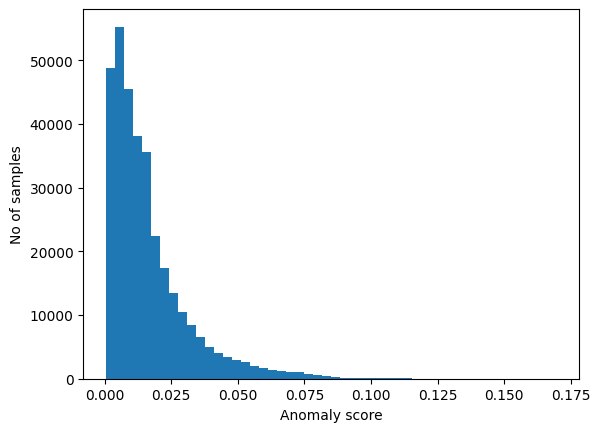

In [52]:
plt.hist(lista, bins=50)
plt.xlabel("Anomaly score")
plt.ylabel("No of samples")
plt.show()

In [53]:
predicted_df['predictions'] = lista

In [54]:
predicted_df

building_id                    primary_use  \
2016-01-04 00:00:00           69                        Parking   
2016-01-04 01:00:00           69                        Parking   
2016-01-04 02:00:00           69                        Parking   
2016-01-04 03:00:00           69                        Parking   
2016-01-04 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-04 00:00:00       0.139088            0.757143           0        0   
2016-01-04 01:00:00       0.139088            0.760317           0        0   
2016-01-04 02:00:00       0.139088            0.746032           0        0   
2016-01-04 03:00:00       0.139088            0.742857           0        0   
2016-01-04 04:00:00       0.139088            0.738095           0        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511            0.000000           0        0   
2016-12-31 20:00:00       0.336511            0.000000           0        0   
2016-12-31 21:00:00       0.336511            0.000000           0        0   
2016-12-31 22:00:00       0.336511            0.000000           0        0   
2016-12-31 23:00:00       0.336511            0.000000           0        0   

                     weekday  weekday_y  weekday_x  predictions  
2016-01-04 00:00:00        0   0.000000   1.000000     0.006594  
2016-01-04 01:00:00        0   0.000000   1.000000     0.007498  
2016-01-04 02:00:00        0   0.000000   1.000000     0.008007  
2016-01-04 03:00:00        0   0.000000   1.000000     0.008194  
2016-01-04 04:00:00        0   0.000000   1.000000     0.008329  
...                      ...        ...        ...          ...  
2016-12-31 19:00:00        5  -0.974928  -0.222521     0.006640  
2016-12-31 20:00:00        5  -0.974928  -0.222521     0.006646  
2016-12-31 21:00:00        5  -0.974928  -0.222521     0.006639  
2016-12-31 22:00:00        5  -0.974928  -0.222521     0.006621  
2016-12-31 23:00:00        5  -0.974928  -0.222521     0.006582  

[331056 rows x 10 columns]

In [55]:
predicted_df.predictions.min(), predicted_df.predictions.max() #Ricorda: non sono vere e proprie predizioni, si tratta dell'anomaly score

(0.0004130279994569719, 0.1696031093597412)

In [56]:
perc = 90
threshold = (np.percentile(predicted_df.predictions.values, perc))

In [57]:
threshold

0.035489726811647415

In [58]:
predicted_df['threshold'] = threshold

In [59]:
predicted_df['predicted_anomaly'] = predicted_df.predictions > predicted_df['threshold']#anomalies #predicted_df['threshold']#
predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(False,0)
predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(True,1)

/tmp/ipykernel_16314/3264709519.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(True,1)


In [60]:
predicted_df.predicted_anomaly.unique()

array([0, 1])

In [61]:
len(predicted_df[predicted_df.predicted_anomaly == 1])/len(predicted_df)

0.10000120825479678

In [62]:
predicted_df.index.names=['timestamp']
predicted_df= predicted_df.reset_index()

In [63]:
predicted_df = pd.merge(predicted_df, df[['timestamp','building_id']], on=['timestamp','building_id'])

In [64]:
print(classification_report(predicted_df.anomaly, predicted_df.predicted_anomaly))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94    322044
           1       0.05      0.22      0.08      7635

    accuracy                           0.89    329679
   macro avg       0.52      0.56      0.51    329679
weighted avg       0.96      0.89      0.92    329679



In [65]:
roc_auc_score(predicted_df['anomaly'], predicted_df['predicted_anomaly'])

0.5605028729920833